In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [25]:
fr=pd.read_csv('France/ca9c053f-26e6-465b-8680-e08ac323993b_Data.csv')
frr=pd.read_csv('France/ca9c053f-26e6-465b-8680-e08ac323993b_Series - Metadata.csv', error_bad_lines=False)

uk=pd.read_csv('UK/62de1687-f583-4431-a404-8f7ac0a6d6fc_Data.csv')
ukk=pd.read_csv('UK/62de1687-f583-4431-a404-8f7ac0a6d6fc_Series - Metadata.csv', error_bad_lines=False)

b'Skipping line 31: expected 14 fields, saw 19\nSkipping line 32: expected 14 fields, saw 19\nSkipping line 33: expected 14 fields, saw 19\nSkipping line 58: expected 14 fields, saw 15\nSkipping line 59: expected 14 fields, saw 15\nSkipping line 69: expected 14 fields, saw 19\nSkipping line 137: expected 14 fields, saw 17\nSkipping line 138: expected 14 fields, saw 17\nSkipping line 139: expected 14 fields, saw 17\nSkipping line 158: expected 14 fields, saw 16\nSkipping line 161: expected 14 fields, saw 16\nSkipping line 164: expected 14 fields, saw 16\nSkipping line 167: expected 14 fields, saw 16\nSkipping line 170: expected 14 fields, saw 16\nSkipping line 173: expected 14 fields, saw 16\nSkipping line 181: expected 14 fields, saw 15\nSkipping line 182: expected 14 fields, saw 15\nSkipping line 183: expected 14 fields, saw 15\n'
b'Skipping line 7: expected 21 fields, saw 24\nSkipping line 8: expected 21 fields, saw 24\nSkipping line 9: expected 21 fields, saw 24\nSkipping line 30: e

In [26]:
fr

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,France,FRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100
1,France,FRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,9.439,9.2798,9.1206,8.9614,8.8022
2,France,FRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,56.0504984458119,57.1436364142437,58.2423734051435,59.2447436227006,60.0524272863093
3,France,FRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1.63179503677703,1.45863217691004,1.55635615985933,1.60564438654459,1.45039325701527
4,France,FRA,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,-8.62275807969641,-1.91354576224008,14.7035204103611,0.560125745406097,-9.73890334724162
...,...,...,...,...,...,...,...,...,...
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,Data from database: Jobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
fr = fr.drop(fr[fr['Country Name']!='France'].index)

In [28]:
fr

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,France,FRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100
1,France,FRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,9.439,9.2798,9.1206,8.9614,8.8022
2,France,FRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,56.0504984458119,57.1436364142437,58.2423734051435,59.2447436227006,60.0524272863093
3,France,FRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1.63179503677703,1.45863217691004,1.55635615985933,1.60564438654459,1.45039325701527
4,France,FRA,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,-8.62275807969641,-1.91354576224008,14.7035204103611,0.560125745406097,-9.73890334724162
...,...,...,...,...,...,...,...,...,...
161,France,FRA,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,8.63900017738342,8.30199974775314,8.53800000250339,8.5699996650219,8.89400026202202
162,France,FRA,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,7.15300005674362,7.01799979805947,7.40299981832504,7.36299982666969,7.60700008273125
163,France,FRA,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,92.318000793457,92.2509994506836,91.8209991455078,91.7620010375977,91.5390014648438
164,France,FRA,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,85.0830001831055,85.4380035400391,85.177001953125,85.2279968261719,85.0130004882813


In [29]:
fr.isna().sum()

Country Name     0
Country Code     0
Series Name      0
Series Code      0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
dtype: int64

In [30]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

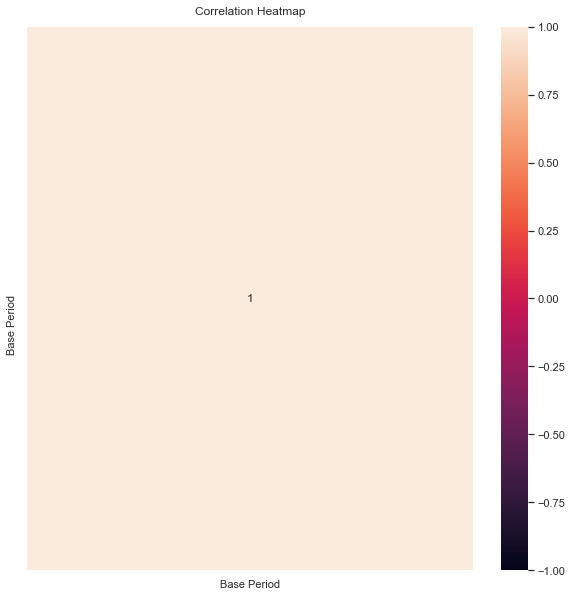

In [31]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(frr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [32]:
frr

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Unit of measure,Periodicity,Base Period,Aggregation method,Limitations and exceptions,General comments,Notes from original source
0,EG.ELC.ACCS.ZS,CC BY-4.0,Access to electricity (% of population),NaN,Access to electricity is the percentage of pop...,"World Bank, Sustainable Energy for All (SE4ALL...",Environment: Energy production & use,NaN,Annual,NaN,Weighted average,NaN,NaN,NaN
1,SP.ADO.TFRT,CC BY-4.0,"Adolescent fertility rate (births per 1,000 wo...",NaN,Adolescent fertility rate is the number of bir...,"United Nations Population Division, World Popu...",Health: Reproductive health,NaN,Annual,NaN,Weighted average,NaN,NaN,NaN
2,SP.POP.DPND,CC BY-4.0,Age dependency ratio (% of working-age populat...,NaN,Age dependency ratio is the ratio of dependent...,World Bank staff estimates based on age distri...,Health: Population: Dynamics,NaN,Annual,NaN,Weighted average,Because the five-year age group is the cohort ...,Relevance to gender indicator: this indicator ...,NaN
3,NV.AGR.TOTL.ZS,CC BY-4.0,"Agriculture, value added (% of GDP)",NaN,Agriculture corresponds to ISIC divisions 1-5 ...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Sha...,NaN,Annual,NaN,Weighted average,Among the difficulties faced by compilers of n...,Note: Data for OECD countries are based on ISI...,NaN
4,NV.AGR.TOTL.KD.ZG,CC BY-4.0,"Agriculture, value added (annual % growth)",NaN,Annual growth rate for agricultural value adde...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Gro...,NaN,Annual,NaN,Weighted average,Among the difficulties faced by compilers of n...,Note: Data for OECD countries are based on ISI...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,SP.URB.TOTL,CC BY-4.0,Urban population,NaN,Urban population refers to people living in ur...,World Bank staff estimates based on the United...,Environment: Density & urbanization,NaN,Annual,NaN,Sum,Aggregation of urban and rural population may ...,NaN,NaN
152,SP.URB.TOTL.IN.ZS,CC BY-4.0,Urban population (% of total),NaN,Urban population refers to people living in ur...,United Nations Population Division. World Urba...,Environment: Density & urbanization,NaN,Annual,NaN,Weighted average,Aggregation of urban and rural population may ...,NaN,NaN
153,SL.EMP.VULN.FE.ZS,CC BY-4.0,"Vulnerable employment, female (% of female emp...",NaN,Vulnerable employment is contributing family w...,Derived using data from International Labour O...,Social Protection & Labor: Economic activity,NaN,Annual,NaN,Weighted average,Data are drawn from labor force surveys and ho...,Data up to 2016 are estimates while data from ...,NaN
154,SL.EMP.VULN.MA.ZS,CC BY-4.0,"Vulnerable employment, male (% of male employm...",NaN,Vulnerable employment is contributing family w...,Derived using data from International Labour O...,Social Protection & Labor: Economic activity,NaN,Annual,NaN,Weighted average,Data are drawn from labor force surveys and ho...,Data up to 2016 are estimates while data from ...,NaN


In [33]:
frr.isna().sum()

Code                            0
License Type                    0
Indicator Name                  1
Short definition              146
Long definition                 2
Source                          2
Topic                           2
Unit of measure               148
Periodicity                     2
Base Period                   147
Aggregation method             16
Limitations and exceptions     43
General comments               73
Notes from original source    154
dtype: int64

In [34]:
frr=frr.drop(columns=['Short definition', 'Unit of measure','Base Period','Notes from original source'])

In [35]:
uk

,Series Name,Series Code,Country Name,Country Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,United Kingdom,GBR,98.1568298339844,..,..,100,..,..,98.7131805419922,..,..,..
1,Account ownership at a financial institution o...,FX.OWN.TOTL.PL.ZS,United Kingdom,GBR,89.892951965332,..,..,100,..,..,90.2228546142578,..,..,..
2,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,United Kingdom,GBR,97.201286315918,..,..,98.9310531616211,..,..,96.3663177490234,..,..,..
3,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,United Kingdom,GBR,96.70703125,..,..,99.2217025756836,..,..,96.6740875244141,..,..,..
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,United Kingdom,GBR,100,100,100,100,100,100,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
uk = uk.drop(uk[uk['Country Name']!='United Kingdom'].index)

In [37]:
uk.isna().sum()

Series Name      0
Series Code      0
Country Name     0
Country Code     0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
dtype: int64

In [38]:
uk

,Series Name,Series Code,Country Name,Country Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,United Kingdom,GBR,98.1568298339844,..,..,100,..,..,98.7131805419922,..,..,..
1,Account ownership at a financial institution o...,FX.OWN.TOTL.PL.ZS,United Kingdom,GBR,89.892951965332,..,..,100,..,..,90.2228546142578,..,..,..
2,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,United Kingdom,GBR,97.201286315918,..,..,98.9310531616211,..,..,96.3663177490234,..,..,..
3,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,United Kingdom,GBR,96.70703125,..,..,99.2217025756836,..,..,96.6740875244141,..,..,..
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,United Kingdom,GBR,100,100,100,100,100,100,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,United Kingdom,GBR,..,..,..,..,..,..,..,..,..,..
1439,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,United Kingdom,GBR,..,..,..,..,..,..,..,..,..,..
1440,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,United Kingdom,GBR,..,..,..,..,..,..,..,..,..,0.05
1441,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,United Kingdom,GBR,..,..,..,..,..,..,..,..,..,..


In [14]:
ukk

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Unit of measure,Periodicity,...,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,Notes from original source,Related source links,Related indicators,License URL
0,FX.OWN.TOTL.OL.ZS,CC BY-4.0,Account ownership at a financial institution o...,NaN,Account denotes the percentage of respondents ...,"Demirguc-Kunt et al., 2018, Global Financial I...",Financial Sector: Access,NaN,NaN,Annual,...,Weighted average,NaN,NaN,NaN,Each economy is classified based on the classi...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,FX.OWN.TOTL.PL.ZS,CC BY-4.0,Account ownership at a financial institution o...,NaN,Account denotes the percentage of respondents ...,"Demirguc-Kunt et al., 2018, Global Financial I...",Financial Sector: Access,NaN,NaN,Annual,...,Weighted average,NaN,NaN,NaN,Each economy is classified based on the classi...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,FX.OWN.TOTL.ZS,CC BY-4.0,Account ownership at a financial institution o...,NaN,Account denotes the percentage of respondents ...,"Demirguc-Kunt et al., 2018, Global Financial I...",Financial Sector: Access,NaN,NaN,Annual,...,Weighted average,NaN,NaN,NaN,Each economy is classified based on the classi...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,FX.OWN.TOTL.MA.ZS,CC BY-4.0,Account ownership at a financial institution o...,NaN,Account denotes the percentage of respondents ...,"Demirguc-Kunt et al., 2018, Global Financial I...",Financial Sector: Access,NaN,NaN,Annual,...,Weighted average,NaN,NaN,NaN,Each economy is classified based on the classi...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,EG.CFT.ACCS.ZS,CC BY-4.0,Access to clean fuels and technologies for coo...,NaN,Access to clean fuels and technologies for coo...,"World Bank, Sustainable Energy for All (SE4ALL...",Environment: Energy production & use,NaN,NaN,Annual,...,Weighted average,Data for access to clean fuels and technologie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,SG.VAW.REFU.ZS,CC BY-4.0,Women who believe a husband is justified in be...,NaN,Percentage of women ages 15-49 who believe a h...,"Demographic and Health Surveys (DHS), Multiple...",Gender: Health,NaN,NaN,Annual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1606,SP.M15.2024.FE.ZS,CC BY-4.0,Women who were first married by age 15 (% of w...,NaN,Women who were first married by age 15 refers ...,Demographic and Health Surveys (DHS),Gender: Agency,NaN,NaN,NaN,...,NaN,NaN,Although the legal age of marriage is defined ...,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1607,SP.M18.2024.FE.ZS,CC BY-4.0,Women who were first married by age 18 (% of w...,NaN,Women who were first married by age 18 refers ...,"Demographic and Health Surveys (DHS), Multiple...",Gender: Agency,NaN,NaN,Annual,...,NaN,NaN,Although the legal age of marriage is defined ...,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1608,SH.DYN.AIDS.FE.ZS,CC BY-4.0,Women's share of population ages 15+ living wi...,NaN,Prevalence of HIV is the percentage of people ...,UNAIDS estimates.,Health: Risk factors,NaN,NaN,Annual,...,Weighted average,HIV prevalence rates reflect the rate of HIV i...,NaN,The limited availability of data on health sta...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...


In [15]:
ukk.isna().sum()

Code                                      0
License Type                             60
Indicator Name                           68
Short definition                       1326
Long definition                         152
Source                                  148
Topic                                   162
Dataset                                1504
Unit of measure                        1502
Periodicity                             228
Base Period                            1517
Aggregation method                      596
Statistical concept and methodology     717
Development relevance                   940
Limitations and exceptions              861
General comments                       1131
Other notes                            1579
Notes from original source             1539
Related source links                   1600
Related indicators                     1599
License URL                             344
dtype: int64

In [18]:
ukk=ukk.drop(columns=['Short definition', 'Dataset', 'Unit of measure','Base Period','General comments','Other notes','Notes from original source','Related source links','Related indicators'])

In [41]:
f=fr.T
f

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
Country Name,France,France,France,France,France,France,France,France,France,France,...,France,France,France,France,France,France,France,France,France,France
Country Code,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,...,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA
Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Air transport, registered carrier departures w...","Automated teller machines (ATMs) (per 100,000 ...","Borrowers from commercial banks (per 1,000 adu...",Consumer price index (2010 = 100),...,"Unemployment, youth male (% of male labor forc...","Unemployment, youth total (% of total labor fo...",Urban population,Urban population (% of total),"Vulnerable employment, female (% of female emp...","Vulnerable employment, male (% of male employm...","Vulnerable employment, total (% of total emplo...","Wage and salaried workers, female (% of female...","Wage and salaried workers, male (% of male emp...","Wage and salaried workers, total (% of total e..."
Series Code,EG.ELC.ACCS.ZS,SP.ADO.TFRT,SP.POP.DPND,NV.AGR.TOTL.ZS,NV.AGR.TOTL.KD.ZG,NV.AGR.TOTL.KD,IS.AIR.DPRT,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,...,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS
2012 [YR2012],100,9.439,56.0504984458119,1.63179503677703,-8.62275807969641,40241849468.5983,739353.599757151,109.250557662069,..,104.107058016154,...,23.9720001220703,23.5599994659424,51791128,78.878,5.45299983024597,8.63900017738342,7.15300005674362,92.318000793457,85.0830001831055,88.4589996337891
2013 [YR2013],100,9.2798,57.1436364142437,1.45863217691004,-1.91354576224008,39471803263.4449,641440,108.810140425895,..,105.006246810607,...,23.7169990539551,23.9829998016357,52228040,79.135,5.5650001168251,8.30199974775314,7.01799979805947,92.2509994506836,85.4380035400391,88.6320037841797
2014 [YR2014],100,9.1206,58.2423734051435,1.55635615985933,14.7035204103611,45275547912.6231,610197,108.045764389539,..,105.539425293424,...,25.048999786377,24.1429996490479,52650998,79.394,6.12399983406067,8.53800000250339,7.40299981832504,91.8209991455078,85.177001953125,88.302001953125
2015 [YR2015],100,8.9614,59.2447436227006,1.60564438654459,0.560125745406097,45529147912.8554,607168,106.992747524193,..,105.579017755019,...,25.6380004882813,24.5610008239746,53044946,79.655,6.01100021600723,8.5699996650219,7.36299982666969,91.7620010375977,85.2279968261719,88.3089981079102
2016 [YR2016],100,8.8022,60.0524272863093,1.45039325701527,-9.73890334724162,41095108202.7997,599427,104.380441132115,..,105.772580900597,...,24.9200000762939,24.4710006713867,53432321,79.917,6.16000014543534,8.89400026202202,7.60700008273125,91.5390014648438,85.0130004882813,88.0849990844727


In [44]:
f=f.rename(columns=f.iloc[2])
f

,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)","Borrowers from commercial banks (per 1,000 adults)",Consumer price index (2010 = 100),...,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,France,France,France,France,France,France,France,France,France,France,...,France,France,France,France,France,France,France,France,France,France
Country Code,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,...,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA
Series Name,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Air transport, registered carrier departures w...","Automated teller machines (ATMs) (per 100,000 ...","Borrowers from commercial banks (per 1,000 adu...",Consumer price index (2010 = 100),...,"Unemployment, youth male (% of male labor forc...","Unemployment, youth total (% of total labor fo...",Urban population,Urban population (% of total),"Vulnerable employment, female (% of female emp...","Vulnerable employment, male (% of male employm...","Vulnerable employment, total (% of total emplo...","Wage and salaried workers, female (% of female...","Wage and salaried workers, male (% of male emp...","Wage and salaried workers, total (% of total e..."
Series Code,EG.ELC.ACCS.ZS,SP.ADO.TFRT,SP.POP.DPND,NV.AGR.TOTL.ZS,NV.AGR.TOTL.KD.ZG,NV.AGR.TOTL.KD,IS.AIR.DPRT,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,...,SL.UEM.1524.MA.ZS,SL.UEM.1524.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.EMP.VULN.FE.ZS,SL.EMP.VULN.MA.ZS,SL.EMP.VULN.ZS,SL.EMP.WORK.FE.ZS,SL.EMP.WORK.MA.ZS,SL.EMP.WORK.ZS
2012 [YR2012],100,9.439,56.0504984458119,1.63179503677703,-8.62275807969641,40241849468.5983,739353.599757151,109.250557662069,..,104.107058016154,...,23.9720001220703,23.5599994659424,51791128,78.878,5.45299983024597,8.63900017738342,7.15300005674362,92.318000793457,85.0830001831055,88.4589996337891
2013 [YR2013],100,9.2798,57.1436364142437,1.45863217691004,-1.91354576224008,39471803263.4449,641440,108.810140425895,..,105.006246810607,...,23.7169990539551,23.9829998016357,52228040,79.135,5.5650001168251,8.30199974775314,7.01799979805947,92.2509994506836,85.4380035400391,88.6320037841797
2014 [YR2014],100,9.1206,58.2423734051435,1.55635615985933,14.7035204103611,45275547912.6231,610197,108.045764389539,..,105.539425293424,...,25.048999786377,24.1429996490479,52650998,79.394,6.12399983406067,8.53800000250339,7.40299981832504,91.8209991455078,85.177001953125,88.302001953125
2015 [YR2015],100,8.9614,59.2447436227006,1.60564438654459,0.560125745406097,45529147912.8554,607168,106.992747524193,..,105.579017755019,...,25.6380004882813,24.5610008239746,53044946,79.655,6.01100021600723,8.5699996650219,7.36299982666969,91.7620010375977,85.2279968261719,88.3089981079102
2016 [YR2016],100,8.8022,60.0524272863093,1.45039325701527,-9.73890334724162,41095108202.7997,599427,104.38044113211

In [49]:
#f=f.drop('Series Name')
f=f.drop('Series Code')
f=f.drop('Country Code')
f=f.drop('Country Name')
f

,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)","Borrowers from commercial banks (per 1,000 adults)",Consumer price index (2010 = 100),...,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
2012 [YR2012],100,9.439,56.0504984458119,1.63179503677703,-8.62275807969641,40241849468.5983,739353.599757151,109.250557662069,..,104.107058016154,...,23.9720001220703,23.5599994659424,51791128,78.878,5.45299983024597,8.63900017738342,7.15300005674362,92.318000793457,85.0830001831055,88.4589996337891
2013 [YR2013],100,9.2798,57.1436364142437,1.45863217691004,-1.91354576224008,39471803263.4449,641440,108.810140425895,..,105.006246810607,...,23.7169990539551,23.9829998016357,52228040,79.135,5.5650001168251,8.30199974775314,7.01799979805947,92.2509994506836,85.4380035400391,88.6320037841797
2014 [YR2014],100,9.1206,58.2423734051435,1.55635615985933,14.7035204103611,45275547912.6231,610197,108.045764389539,..,105.539425293424,...,25.048999786377,24.1429996490479,52650998,79.394,6.12399983406067,8.53800000250339,7.40299981832504,91.8209991455078,85.177001953125,88.302001953125
2015 [YR2015],100,8.9614,59.2447436227006,1.60564438654459,0.560125745406097,45529147912.8554,607168,106.992747524193,..,105.579017755019,...,25.6380004882813,24.5610008239746,53044946,79.655,6.01100021600723,8.5699996650219,7.36299982666969,91.7620010375977,85.2279968261719,88.3089981079102
2016 [YR2016],100,8.8022,60.0524272863093,1.45039325701527,-9.73890334724162,41095108202.7997,599427,104.380441132115,..,105.772580900597,...,24.9200000762939,24.4710006713867,53432321,79.917,6.16000014543534,8.89400026202202,7.60700008273125,91.5390014648438,85.0130004882813,88.0849990844727


Text(0.5, 1.0, 'Correlation Heatmap')

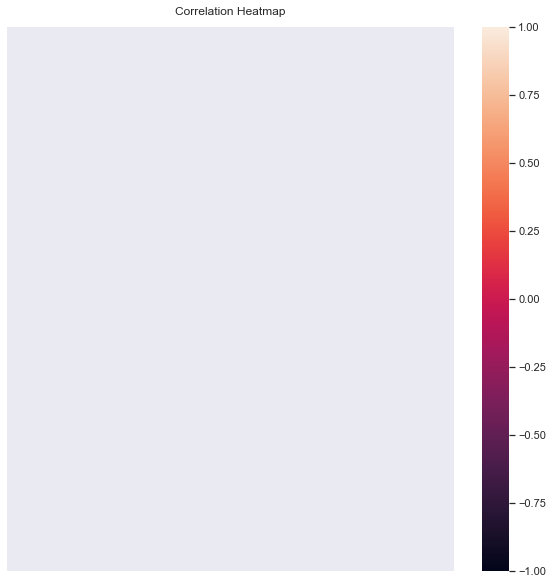

In [50]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(f.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)